In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [78]:
data=pd.read_csv("covtype.data")

In [79]:
columnas_Soil_Type = ["Soil_Type" + str(i) for i in range(1, 41)]
columnas_Wilderness_Area = ["Wilderness_Area" + str(i) for i in range(1, 5)]
columnas_restantes = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
"Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon",
"Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
ultima_columna = ["Cover_Type"]
columnas = columnas_restantes + columnas_Wilderness_Area + columnas_Soil_Type + ultima_columna

In [80]:
data.columns=columnas

In [81]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [82]:
target = 'Cover_Type'
features = [x for x in data.columns if x!=target]



In [83]:


# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = DecisionTreeRegressor(random_state=100)
X=data[features]
y=data[target]
# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X, y)

DecisionTreeRegressor(random_state=100)

In [84]:
importances=pd.Series(arbol_importancia.feature_importances_,index=X.columns)
#Ordenar las importancias de las variables de mayor a menor:
sorted_importances = importances.sort_values(ascending=False)
#Calcular la suma acumulada de las importancias y el porcentaje que representa cada variable:
cumulative_importances = sorted_importances.cumsum()
cumulative_importances_percent = 100*cumulative_importances/cumulative_importances[-1]

In [85]:
#Seleccionar las variables que aglutinan hasta el 95% de la información requerida:
selected_variables = cumulative_importances_percent[cumulative_importances_percent <= 95].index
selected_variables = selected_variables.append(pd.Index(["Cover_Type"]))

print(selected_variables)


Index(['Elevation', 'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Wilderness_Area3', 'Soil_Type32',
       'Hillshade_9am', 'Hillshade_Noon', 'Aspect', 'Wilderness_Area1',
       'Hillshade_3pm', 'Soil_Type39', 'Slope', 'Wilderness_Area2',
       'Soil_Type38', 'Soil_Type35', 'Soil_Type33', 'Cover_Type'],
      dtype='object')


In [86]:
data_1 = data[selected_variables]
print(data_1)


        Elevation  Horizontal_Distance_To_Fire_Points  \
0            2590                                6225   
1            2804                                6121   
2            2785                                6211   
3            2595                                6172   
4            2579                                6031   
...           ...                                 ...   
581006       2396                                 837   
581007       2391                                 845   
581008       2386                                 854   
581009       2384                                 864   
581010       2383                                 875   

        Horizontal_Distance_To_Roadways  Horizontal_Distance_To_Hydrology  \
0                                   390                               212   
1                                  3180                               268   
2                                  3090                               242   
3      

Ejercicio2

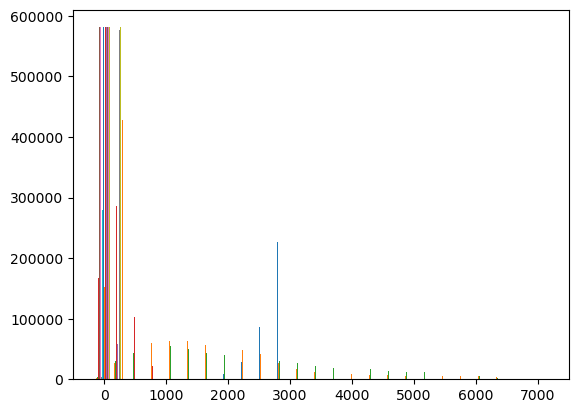

In [87]:
#histograma
plt.hist(data_1.values,bins=25)
plt.show()

ahora vamos a normalizarlos

In [91]:
cols_to_normalize = data_1.columns[:-1]
# Normalizar columnas numéricas
data_1.loc[:, cols_to_normalize] = (data_1.loc[:, cols_to_normalize] - data_1.loc[:, cols_to_normalize].min()) / (data_1.loc[:, cols_to_normalize].max() - data_1.loc[:, cols_to_normalize].min())

# Restar 1 de la columna "Cover_Type"
data_1.loc[:, 'Cover_Type'] = data_1['Cover_Type'] - 1



In [92]:
data_normalizada=data_1.copy()
print(data_1)

        Elevation  Horizontal_Distance_To_Fire_Points  \
0        0.365683                            0.867838   
1        0.472736                            0.853339   
2        0.463232                            0.865886   
3        0.368184                            0.860449   
4        0.360180                            0.840792   
...           ...                                 ...   
581006   0.268634                            0.116688   
581007   0.266133                            0.117803   
581008   0.263632                            0.119058   
581009   0.262631                            0.120452   
581010   0.262131                            0.121985   

        Horizontal_Distance_To_Roadways  Horizontal_Distance_To_Hydrology  \
0                              0.054798                          0.151754   
1                              0.446817                          0.191840   
2                              0.434172                          0.173228   
3      

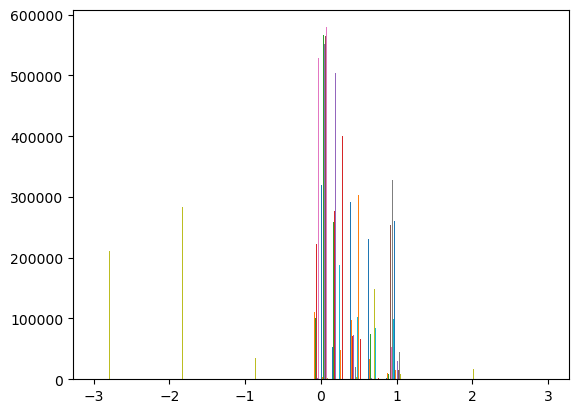

In [93]:
plt.hist(data_normalizada.values,bins=25)
plt.show()

la diferencia es clara, es mucho mas facil analizar la 2 grafica que la primera

EJERCICIO 3

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [107]:
model = LogisticRegression(max_iter=1000, random_state=100) # con 1000 iteraciones no llega a converger
model.fit(X_train, y_train)

c:\Users\Angel Martínez\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=100)

In [113]:
# predecir en datos de test y calcular métricas de evaluación
from sklearn.metrics import accuracy_score, f1_score,classification_report ,confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print('F1-score (weighted):', f1)
report = classification_report(y_test, y_pred, zero_division=0)
print('Classification report:\n', report)
matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', matrix)

Accuracy: 0.6813507396538816
F1-score (weighted): 0.6536267872506883
Classification report:
               precision    recall  f1-score   support

           1       0.67      0.70      0.68     42680
           2       0.70      0.79      0.74     56417
           3       0.62      0.64      0.63      7136
           4       0.55      0.19      0.28       578
           5       0.00      0.00      0.00      1873
           6       0.30      0.02      0.03      3400
           7       0.34      0.02      0.04      4119

    accuracy                           0.68    116203
   macro avg       0.45      0.34      0.34    116203
weighted avg       0.65      0.68      0.65    116203

Confusion matrix:
 [[29685 12852     2     0     0     0   141]
 [10913 44686   763     0     0    29    26]
 [    0  2399  4553    85     0    99     0]
 [    0    15   453   109     0     1     0]
 [   19  1847     7     0     0     0     0]
 [    0  1741  1601     3     0    55     0]
 [ 3888   144     0  

EJERCICIO 4

In [115]:
from sklearn.tree import DecisionTreeClassifier   
tree = DecisionTreeClassifier (random_state=100)
tree.fit(X_train, y_train)



DecisionTreeClassifier(random_state=100)

In [118]:
# predecir en datos de test y calcular métricas de evaluación
from sklearn.metrics import accuracy_score, f1_score,classification_report ,confusion_matrix
y_pred = tree.predict(X_test) #lo hacemos pero esta vez con tree
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print('F1-score (weighted):', f1)
report = classification_report(y_test, y_pred, zero_division=0)
print('Classification report:\n', report)
matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', matrix)

Accuracy: 0.9374456769618684
F1-score (weighted): 0.9374158309835098
Classification report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     42680
           2       0.95      0.95      0.95     56417
           3       0.92      0.93      0.93      7136
           4       0.84      0.81      0.82       578
           5       0.83      0.83      0.83      1873
           6       0.87      0.86      0.87      3400
           7       0.94      0.94      0.94      4119

    accuracy                           0.94    116203
   macro avg       0.90      0.89      0.90    116203
weighted avg       0.94      0.94      0.94    116203

Confusion matrix:
 [[39956  2456     2     0    43     6   217]
 [ 2325 53543   142     0   241   133    33]
 [    2   169  6622    62    25   256     0]
 [    0     1    83   466     0    28     0]
 [   38   266    15     0  1550     4     0]
 [    4   115   310    24    11  2936     0]
 [  222    35     0  

In [119]:
from sklearn.model_selection import GridSearchCV
profundidades = range(2, 31) #rango de profundiades
dtc = DecisionTreeClassifier(random_state=100)
grid={'max_depth':profundidades}
grid_search = GridSearchCV(dtc, grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_ #guardamos los resultados
params = results['params']
scores = results['mean_test_score'] #obtenemos valores de params y results


KeyboardInterrupt: 

In [ ]:
# Crear gráfica de curva de complejidad
plt.plot(profundidades, scores, '-o')
plt.xlabel('Profundidad')
plt.ylabel('Accuracy')
plt.title('Curva de complejidad del modelo Decision Tree')
plt.xticks(profundidades)
plt.show()

EJERCICIO 5

In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=100, oob_score=True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1 = f1_score(y_test, y_pred, average='weighted')
rfc_report = classification_report(y_test, y_pred, zero_division=0)
rfc_cm = confusion_matrix(y_test, y_pred)
rfc_oob = rfc.oob_score_

In [121]:
tree_depths = [estimator.tree_.max_depth for estimator in rfc.estimators_]
median_tree_depth = np.median(tree_depths)

In [ ]:
n_estimators_range = np.arange(200, 450, 50)
max_depth_range = np.arange(20, 42, 2)
max_features_range = ["auto", "log2", None]

# Definición de los parámetros a evaluar en GridSearchCV
params_grid = {
    "n_estimators": n_estimators_range,
    "max_depth": max_depth_range,
    "max_features": max_features_range
}

# Creación del modelo con GridSearchCV y evaluación
rfc_opt = GridSearchCV(RandomForestClassifier(random_state=100), params_grid, scoring='accuracy', cv=5, n_jobs=-1)
rfc_opt.fit(X_train, y_train)

# Evaluación del modelo óptimo
y_pred = rfc_opt.predict(X_test)

rfc_opt_accuracy = accuracy_score(y_test, y_pred)
rfc_opt_f1 = f1_score(y_test, y_pred, average='weighted')
rfc_opt_report = classification_report(y_test, y_pred, zero_division=0)
rfc_opt_cm = confusion_matrix(y_test, y_pred)
rfc_opt_oob = rfc_opt.best_estimator_.oob_score_

In [ ]:
from sklearn.model_selection import learning_curve

# Definición de la función para obtener la gráfica del Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
title = "Learning Curves (Random Forest)"
plot_learning_curve(RandomForestClassifier(n_estimators=350, max_depth=22, max_features='auto', random_state=100), title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()